In [1]:
# pip install imblearn

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
result_df=pd.read_csv("candidate_result.csv")
result_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,overall_result
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Pass
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Pass
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Pass
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Fail
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Pass
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Pass
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Pass
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Pass


In [26]:
result_df["overall_result"].value_counts()

overall_result
Pass    148
Fail     67
Name: count, dtype: int64

In [27]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  overall_result  215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [28]:
result_df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [29]:
result_df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [30]:
result_df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [31]:
result_df['gender'].unique()

array(['M', 'F'], dtype=object)

In [32]:
result_df['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [33]:
result_df['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [34]:
result_df['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
#No missing values
#Unwanted column- sl_no
result_df_required=result_df.drop("sl_no",axis=1)
result_df_required

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,overall_result
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Pass
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Pass
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Pass
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Fail
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Pass
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Pass
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Pass
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Pass


In [36]:
sns.heatmap(result_df_required.corr())

ValueError: could not convert string to float: 'M'

<AxesSubplot:xlabel='etest_p', ylabel='overall_result'>

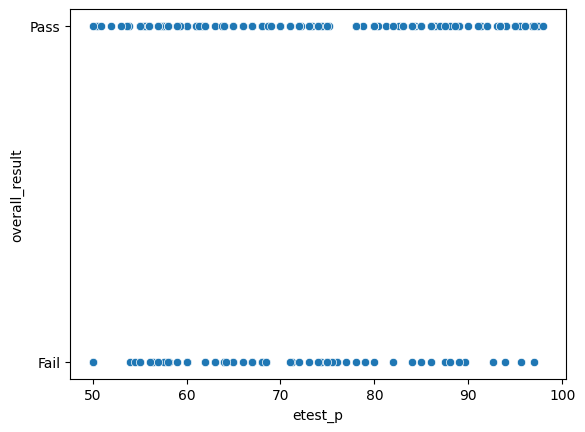

In [37]:
sns.scatterplot(x=result_df_required['etest_p'],y=result_df_required['overall_result'])

<AxesSubplot:xlabel='degree_p', ylabel='overall_result'>

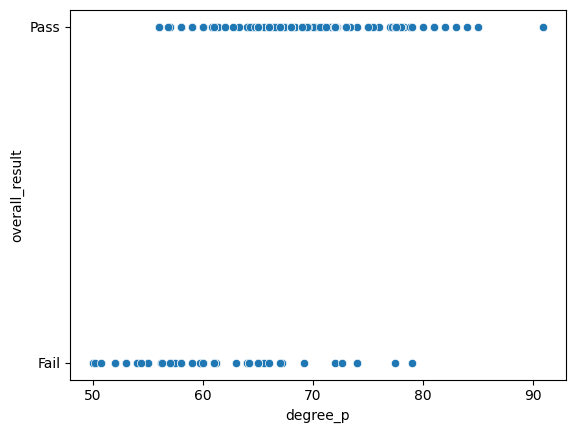

In [38]:
sns.scatterplot(x=result_df_required['degree_p'],y=result_df_required['overall_result'])

<AxesSubplot:xlabel='hsc_p', ylabel='overall_result'>

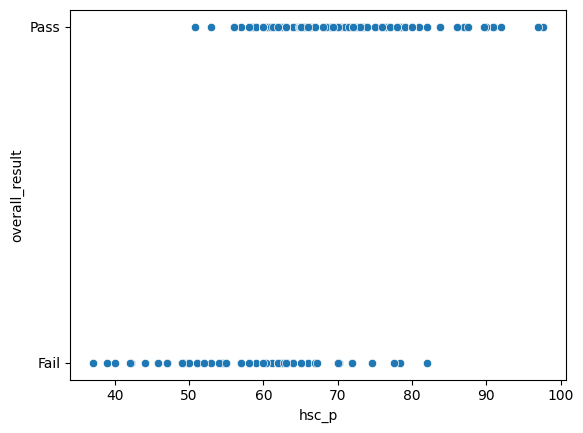

In [39]:
sns.scatterplot(x=result_df_required['hsc_p'],y=result_df_required['overall_result'])

<AxesSubplot:xlabel='hsc_b', ylabel='hsc_p'>

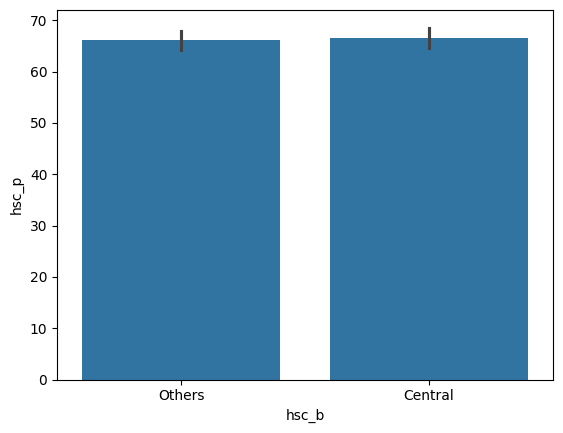

In [40]:
sns.barplot(x=result_df_required['hsc_b'],y=result_df_required['hsc_p'])

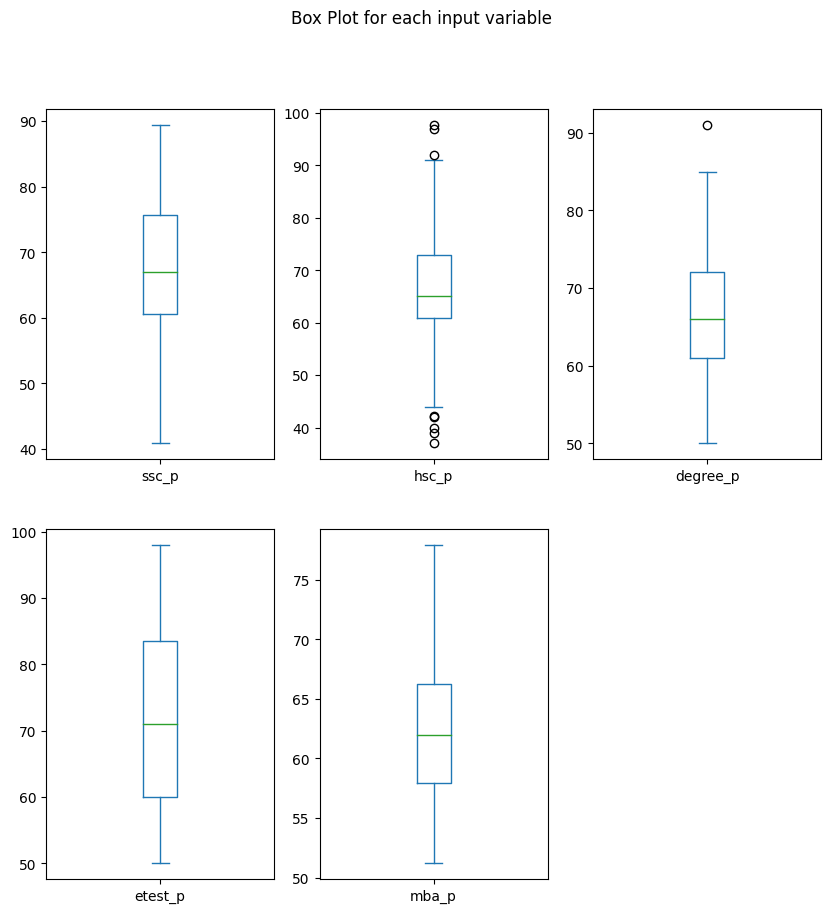

In [41]:
result_df_required.plot(kind='box', subplots=True,layout=(2,3), sharex=False, sharey=False, figsize=(10,10), 
                                        title='Box Plot for each input variable')
plt.savefig('result_boxplot')
plt.show()

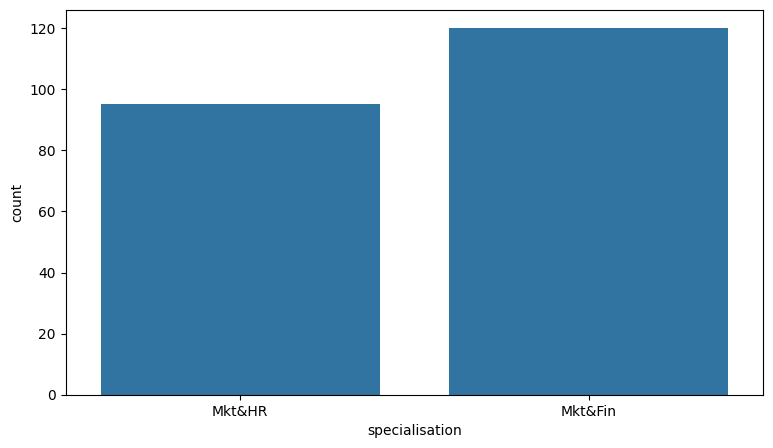

In [42]:
plt.figure(figsize=(9,5))
sns.countplot(x = result_df_required.specialisation)
plt.show()

<Figure size 900x500 with 0 Axes>

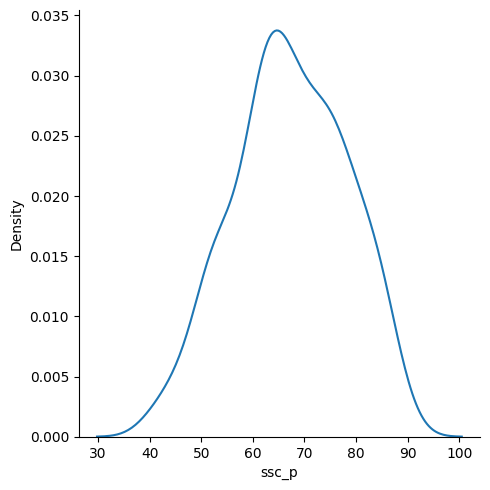

In [43]:
plt.figure(figsize = (9,5))
sns.displot(result_df_required.ssc_p,kind='kde')
plt.show()

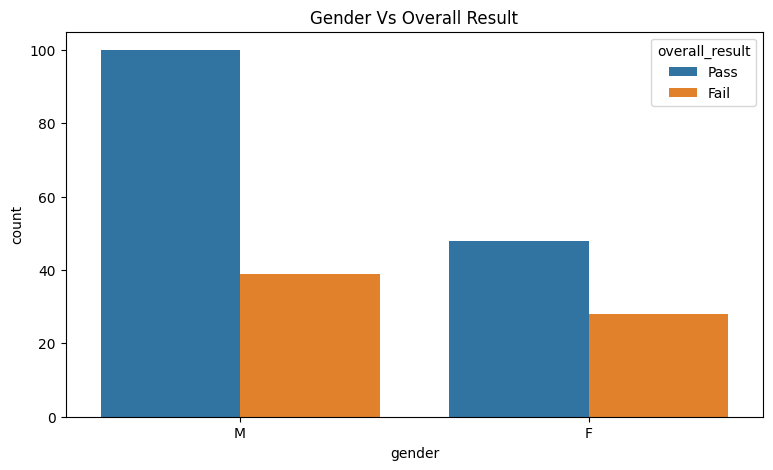

In [44]:
plt.figure(figsize = (9,5))
sns.countplot(x = "gender",hue = "overall_result",data = result_df_required)
plt.title("Gender Vs Overall Result")
plt.show()

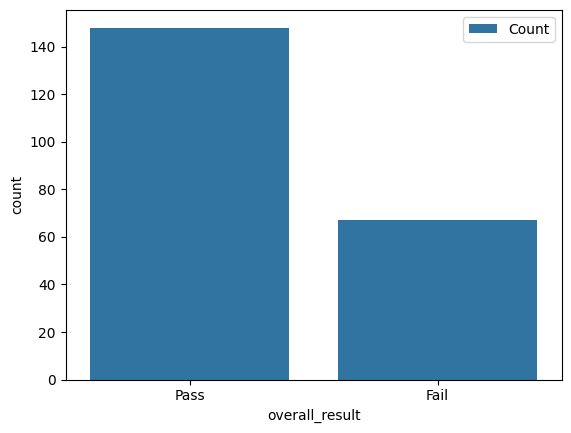

In [45]:
sns.countplot(x=result_df_required['overall_result'],label="Count")
plt.show()